Topic: Challenge Set 7   
Subject: Classification  
Date: 02/05/2018  
Name: Laura Chen  
Worked with: N/A

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

Topic: Classification

**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

# Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [146]:
#Loading the data
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')

In [148]:
df.replace('n',0,inplace=True)
df.replace('y',1,inplace=True)
df.replace('?',np.nan,inplace=True)
df.fillna(round(df.mean()),inplace=True)
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# Challenge 2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [127]:
y=df.republican
X=df.drop('republican',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

# Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [78]:
knn_scores=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, y_pred))

In [132]:
print(knn_scores)

[0.92366412213740456, 0.92366412213740456, 0.89312977099236646, 0.90839694656488545, 0.91603053435114501, 0.9007633587786259, 0.91603053435114501, 0.91603053435114501, 0.90839694656488545, 0.91603053435114501, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.93129770992366412, 0.91603053435114501, 0.90839694656488545, 0.90839694656488545, 0.90839694656488545, 0.91603053435114501, 0.91603053435114501]


The highest score is at k=14

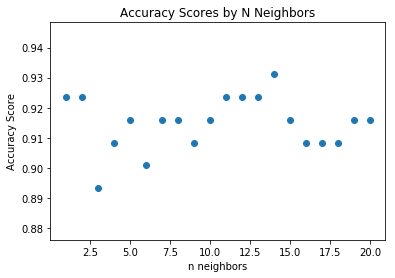

In [144]:
plt.scatter(range(1,21),all_scores)
plt.title('Accuracy Scores by N Neighbors')
plt.xlabel('n neighbors')
plt.ylabel('Accuracy Score')

# Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [129]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
logistic_regr=metrics.accuracy_score(y_test, y_pred)
print(logistic_regr)

0.954198473282


# Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

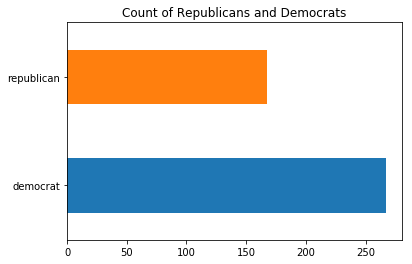

In [58]:
df.republican.value_counts().plot(kind='barh',title='Count of Republicans and Democrats')

In [76]:
def pred_democrat(X):
    a=[]
    for i in range(len(X)):
        a.append('democrat')
    return a

y_pred=pred_democrat(X_test)
all_dems=metrics.accuracy_score(y_test, y_pred)
print(all_dems)

0.603053435115


In [77]:
def pred_republican(X):
    a=[]
    for i in range(len(X)):
        a.append('republican')
    return a

y_pred=pred_republican(X_test)
all_republicans=metrics.accuracy_score(y_test, y_pred)
print(all_republicans)

0.396946564885


Since there are more democrats than republicans in this set, predicting all democrats is more accurate

# Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

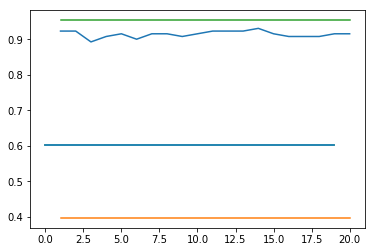

In [130]:
plt.plot(range(1,21),knn_scores,label='KNN')
plt.plot([all_dems for i in range(1,21)],label='all dems')
plt.plot(range(1,21),[all_republicans for i in range(1,21)],label='all republicans')
plt.plot(range(1,21),[logistic_regr for i in range(1,21)],label='logistic regression')

# Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve  
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [122]:
from sklearn.learning_curve import learning_curve

In [139]:
for m in range(1,21):
    train_err=learning_curve(reg,X_train,y_train,cv=m)
    ts_err=learning_curve(reg,X_test,y_test, cv=m)
    train_cv_err = np.mean(train_err, axis=1)
    test_cv_err = np.mean(ts_err, axis=1)

ValueError: could not broadcast input array from shape (5,10) into shape (5)

# Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
SVM (Support Vector Machine) Classifier

from sklearn.svm import SVC
Decision Tree

from sklearn.tree import DecisionTreeClassifier
Random Forest

from sklearn.ensemble import RandomForestClassifier

In [136]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [140]:
from sklearn.cross_validation import cross_val_score 

In [151]:
knn_cvscore = np.mean(cross_val_score(knn,X,y,cv=10))
lr_cvscore = np.mean(cross_val_score(reg,X,y,cv=10))

print('KNN cv score: ',knn_cvscore)
print('Logistic Regression cv score: ',lr_cvscore)

KNN cv score:  0.907467532468
Logistic Regression cv score:  0.955952380952


# Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

# Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [113]:
movie_df=pd.read_csv('2013_movies.csv')

(100, 7)

In [114]:
movie_df.groupby('Rating').Title.count()

Rating
G         1
PG       15
PG-13    47
R        37
Name: Title, dtype: int64

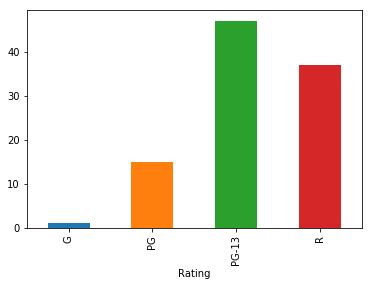

In [115]:
movie_df.groupby('Rating').Title.count().plot(kind='bar')

In [116]:
y=movie_df['Rating']
X=movie_df.drop(['Rating','Title','Director','ReleaseDate'],axis=1)
X.fillna(0,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [117]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [118]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

In [119]:
y_pred=fit.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.60606060606060608

### KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.66666666666666663

In [121]:
# "Stupid baseline" prediction 
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.48484848484848486

# Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.